In [2]:
# KORA_S3S4 Data Analysis - Minimum Model

import math 
import numpy as np
import statistics
import pandas as pd
import scipy.stats
import seaborn as sns
import os
import pandas_profiling as pp
from matplotlib import pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import impute
import pandas_profiling as pp
import nbimporter
import Modeling
from IPython.core.debugger import set_trace
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
import statsmodels.api as sts
import shap
import xgboost
%matplotlib inline

## Loading the data and data splitting

In [3]:

KORA_Noise_noMissing = pd.read_csv('C:\\Users\\sahar.behzadi\\Desktop\\Noise2Nako\\Data\\KORA_S3_S4\\KORA_Noise_noMissing_median.csv')

In [4]:
# Inputs

X = KORA_Noise_noMissing.drop(['hyper_p', 'bp_diast', 'bp_syst'], axis = 1)
X_mini = KORA_Noise_noMissing[['sex', 'age', 'bmi', 'smoking', 'lden_org']]
X_mini_100 = shap.utils.sample(X_mini, 100) # 100 instances for use as the background distribution
print('Data description \n')
print('Sex: Female = 0, Male = 1 \n Smoking: Current = 1, Ex-smoker = 2, Never smoker =3 \n ')


# Output

Y_hyper = KORA_Noise_noMissing['hyper_p'].astype(int)
Y_SBP = KORA_Noise_noMissing['bp_syst']
Y_DBP = KORA_Noise_noMissing['bp_diast']

Data description 

Sex: Female = 0, Male = 1 
 Smoking: Current = 1, Ex-smoker = 2, Never smoker =3 
 


In [52]:
shap.initjs()
XGBoost_model = xgboost.XGBRegressor().fit(X_mini, Y_SBP)
RF_model = RandomForestRegressor(n_estimators= 10, max_depth= 10, random_state= 0,
                                 max_features='sqrt').fit(X_mini, Y_SBP)
LR_model = linear_model.LinearRegression().fit(X_mini, Y_SBP)

In [54]:
# explain the model's predictions using SHAP

# XGBoost
XGBoost_explainer = shap.Explainer(XGBoost_model)
XGBoost_shap_values = XGBoost_explainer(X_mini)

# Random Forest
RF_explainer = shap.Explainer(RF_model)
RF_shap_values = RF_explainer(X_mini)

# Linear Regression
LR_exapliner = shap.explainers.Linear(LR_model, X_mini)
LR_shap_values = LR_exapliner(X_mini)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [26]:
# comparing the prediction's explanation for individuals

ind = 1

print('Random Forest')
shap.plots.force(RF_shap_values[ind])

Random Forest


In [25]:
print('XGBoost')
shap.plots.force(XGBoost_shap_values[ind])

XGBoost


In [55]:
print('Linear Regression')
shap.plots.force(LR_shap_values[ind])

Linear Regression


In [ ]:
#observations = X_mini.to_numpy()
#shap.initjs() 
#shap.force_plot(explainer.expected_value, explainer.shap_values(X_mini),  feature_names=X_mini.columns)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
shap.plots.force is slow for many thousands of rows, try subsampling your data.


In [27]:
# since the algorithm is somehow too slow for the original data we consider a sample and the following plots are for
# a sample data including 100 samples

observations_sample = X_mini.sample(100, random_state=42)
observations = observations_sample.to_numpy()
Y_SBP_sample = Y_SBP[observations_sample.index]
shap.initjs() 

In [30]:
print('Random Forest')
shap.force_plot(RF_explainer.expected_value, RF_explainer.shap_values(observations), features=observations,
                feature_names=X_mini.columns)

Random Forest


In [29]:
print('XGBoost')
shap.force_plot(XGBoost_explainer.expected_value, XGBoost_explainer.shap_values(observations), features=observations,
                feature_names=X_mini.columns)

XGBoost


In [56]:
print('Linear Regression')
shap.force_plot(LR_exapliner.expected_value, LR_exapliner.shap_values(observations), features=observations,
                feature_names=X_mini.columns)

Linear Regression


Random Forest


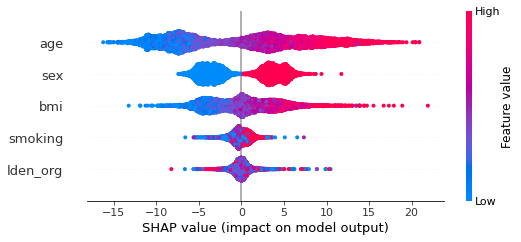

In [31]:
# for the entire dataset
print('Random Forest')
shap.summary_plot(RF_explainer.shap_values(X_mini), features=X_mini, feature_names=X_mini.columns)

XGBoost


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


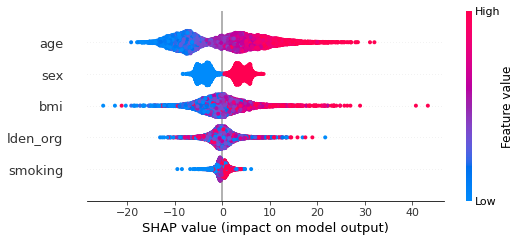

In [32]:
# for the entire dataset
print('XGBoost')
shap.summary_plot(XGBoost_explainer.shap_values(X_mini), features=X_mini, feature_names=X_mini.columns)

Linear Regression


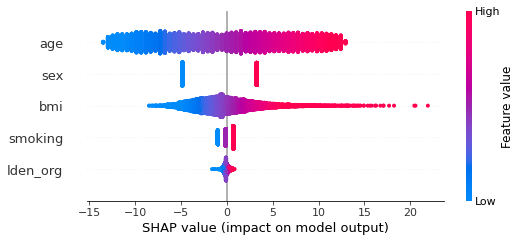

In [57]:
print('Linear Regression')
shap.summary_plot(LR_exapliner.shap_values(X_mini), features=X_mini, feature_names=X_mini.columns)

XGBoost


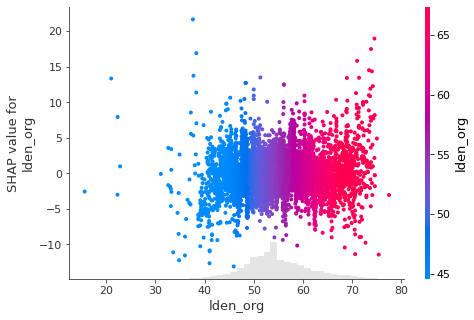

In [63]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
print('XGBoost')
shap.plots.scatter(XGBoost_shap_values[:,"lden_org"], x_jitter=0.5, color = XGBoost_shap_values[:, 'lden_org'])

XGBoost


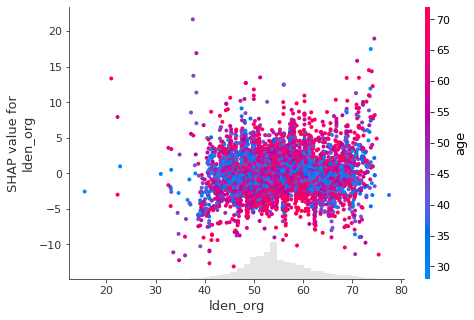

In [62]:
print('XGBoost')
shap.plots.scatter(XGBoost_shap_values[:,"lden_org"], color = XGBoost_shap_values[:, 'age'])

XGBoost


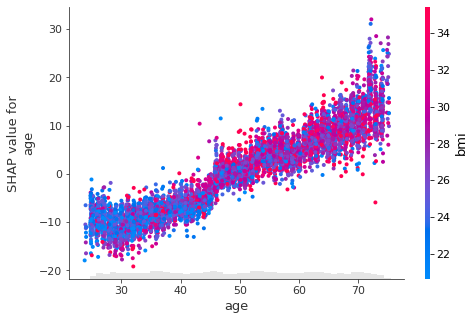

In [87]:
print('XGBoost')
shap.plots.scatter(XGBoost_shap_values[:,"age"], x_jitter=0.5, color = XGBoost_shap_values[:, 'bmi'])

XGBoost


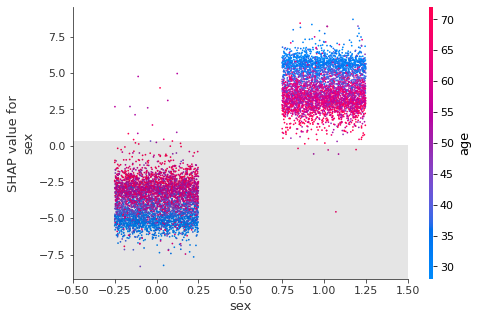

In [85]:
print('XGBoost')
shap.plots.scatter(XGBoost_shap_values[:,"sex"], dot_size = 3 ,x_jitter=0.5, color = XGBoost_shap_values[:, 'age'])

XGBoost


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


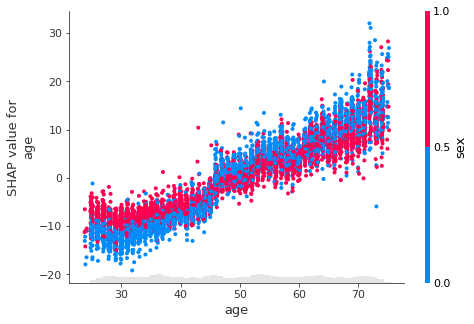

In [96]:
print('XGBoost')
shap.plots.scatter(XGBoost_shap_values[:,"age"], x_jitter=0.4, color = XGBoost_shap_values[:, 'sex'])

### global measure of feature importance

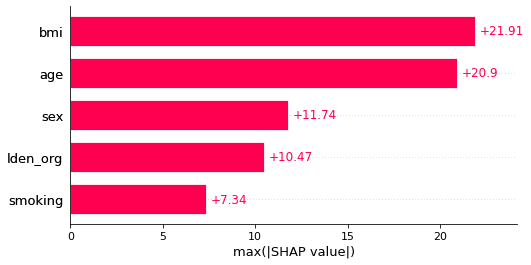

In [39]:
#  max absolute value of shap values for every feature
print('Random Forest')
shap.plots.bar(RF_shap_values.abs.max(0))

XGBoost


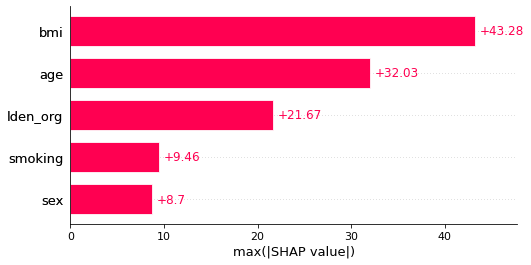

In [40]:
#  max absolute value of shap values for every feature
print('XGBoost')
shap.plots.bar(XGBoost_shap_values.abs.max(0))

Linear Regression


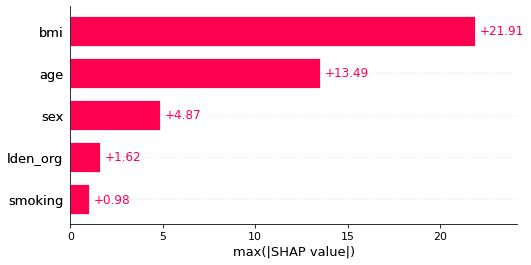

In [59]:
print('Linear Regression')
shap.plots.bar(LR_shap_values.abs.max(0))

In [78]:
print("Model coefficients:\n")
for i in range(len(LR_model.coef_)):
    print(X_mini.columns[i], "=", LR_model.coef_[i].round(4))
    
X_mini['bmi'].mean()

Model coefficients:

sex = 8.1112
age = 0.5181
bmi = 0.7401
smoking = 0.8466
lden_org = 0.0397


27.11508227292659

Random Forest


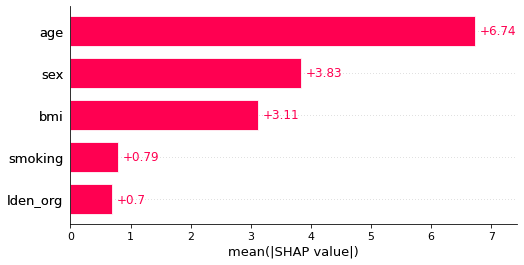

In [41]:
# ploting the mean absolute value for each feature --- 
print('Random Forest')
shap.plots.bar(RF_shap_values)

XGBoost


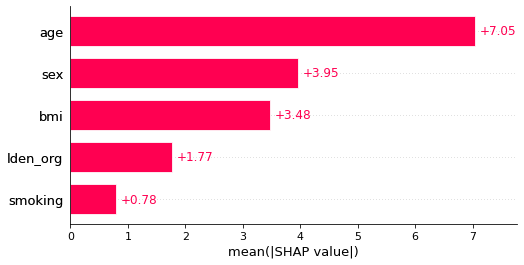

In [42]:
print('XGBoost')
shap.plots.bar(XGBoost_shap_values)

Random Forest


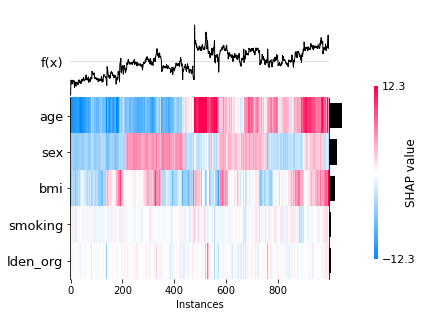

In [43]:
print('Random Forest')
shap.plots.heatmap(RF_shap_values[:1000])

XGBoost


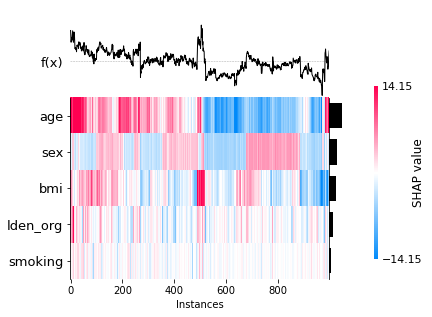

In [44]:
print('XGBoost')
shap.plots.heatmap(XGBoost_shap_values[:1000])

Linear Regression


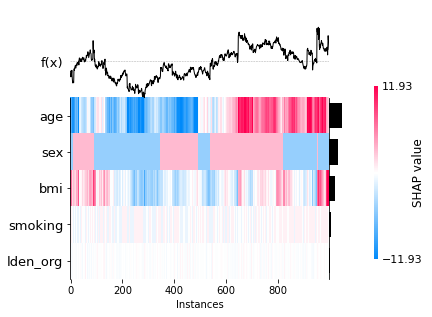

In [82]:
print('Linear Regression')
shap.plots.heatmap(LR_shap_values[:1000])